In [139]:
import importlib
import src.utils as utils
import src.gtfs_handler as gtfs_handler
import src.gps_handler as gps_handler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from numba import jit

importlib.reload(utils)
importlib.reload(gtfs_handler)
importlib.reload(gps_handler)


<module 'src.gps_handler' from 'c:\\Users\\almir\\OneDrive\\Área de Trabalho\\FGV\\5° Período\\Field\\smtr_previsao_tempo_chegada\\fgv\\src\\gps_handler.py'>

In [140]:
# Define the paths to the GTFS and GPS data
GTFS_FOLDER = "./data/gtfs_data"
GPS_FOLDER = "./data/gps_data"

# Define the route to be analyzed
ROUTE = "409"

In [141]:
# Create the GTFS and GPS handlers
gtfs = gtfs_handler.GTFSHandler(GTFS_FOLDER)
gps = gps_handler.GPSHandler(GPS_FOLDER)

GTFS data loaded successfully!
Loading GPS data from 1 CSV files...
GPS data loaded successfully!


In [142]:
gtfs.filter_by_route(ROUTE)

print("Route stops:")
gtfs.route_stops

Route stops:


stop_sequence       stop_id  stop_distance  direction_id shape_id  \
0                 0  2033O00100C0           0.00             0     gnoq   
57                1  2033O00211C0         354.51             0     gnoq   
88                2  2033O00212C0         636.83             0     gnoq   
119               3  2033O00177C0        1255.20             0     gnoq   
150               4  2033O00181C0        1715.36             0     gnoq   
...             ...           ...            ...           ...      ...   
3414             54  2033O00198C0       17641.20             1     wrbl   
3440             55  2033O00199C0       17864.67             1     wrbl   
3466             56  2033O00206C0       18472.22             1     wrbl   
3492             57  2033O00209C0       18704.27             1     wrbl   
3                58  2033O00100C0       18910.26             1     wrbl   

                                 stop_name   stop_lat   stop_lon  \
0     Ponto Final: Saens Peña :: Linha 409 -22.931494 -43.234319   
57                Hospital Casa Evangélico -22.929227 -43.231453   
88               Condomínio Edifício Madri -22.927700 -43.231800   
119                           General Roca -22.924980 -43.233660   
150              Saens Peña Medical Center -22.923610 -43.229666   
...                                    ...        ...        ...   
3414                           Major Ávila -22.922590 -43.231930   
3440                          General Roca -22.923546 -43.233767   
3466                       Silva Guimarães -22.927782 -43.233559   
3492                            Henry Ford -22.929797 -43.234198   
3     Ponto Final: Saens Peña :: Linha 409 -22.931494 -43.234319   

                         geometry  
0     POINT (-43.23432 -22.93149)  
57    POINT (-43.23145 -22.92923)  
88    POINT (-43.23180 -22.92770)  
119   POINT (-43.23366 -22.92498)  
150   POINT (-43.22967 -22.92361)  
...                           ...  
3414  POINT (-43.23193 -22.92259)  
3440  POINT (-43.23377 -22.92355)  
3466  POINT (-43.23356 -22.92778)  
3492  POINT (-43.23420 -22.92980)  
3     POINT (-43.23432 -22.93149)  

[123 rows x 9 columns]

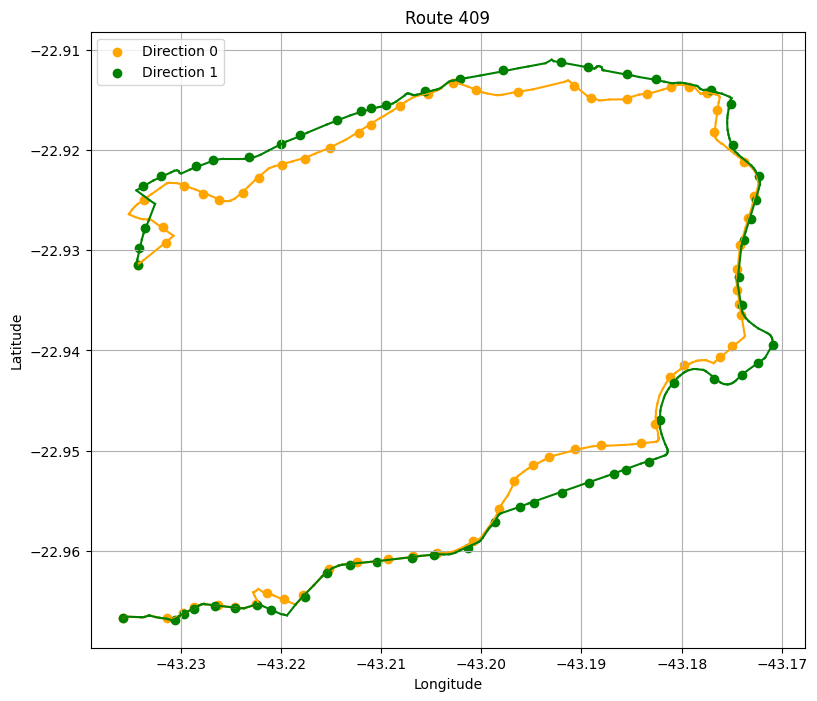

In [143]:
# Plot the route and the stops, colored by the direction
gtfs.plot_route("Route 409")

In [144]:
gps.show_buses()

id_veiculo
A71546    14340
A71545     6926
A71518     2969
A71587     2692
A71515     2643
A71577     2590
A71505     2580
A71531     2559
A71551     2530
A71565     2510
A71533     2459
A71509     2432
A71576     2422
A71503     2376
A71541     2361
A71522     2358
A71502     2319
A71550     2299
A71555     2161
A71527     2160
A71579     2157
A71508     2126
A71553     1380
A71584      282
A71540      194
A71589      133
A71552      121
A71519      117
A71566       88
A71528       86
A71537       75
A71523       41
Name: count, dtype: int64


In [145]:
# Filter the data according to the vehicle id
gps.get_bus_data("A71505")
gps.gps_df

modo        timestamp_gps        data      hora id_veiculo  servico  \
36161  SPPO  2024-02-22 00:10:52  2024-02-22  00:10:52     A71505      409   
7169   SPPO  2024-02-22 00:40:52  2024-02-22  00:40:52     A71505      409   
15     SPPO  2024-02-22 01:10:52  2024-02-22  01:10:52     A71505      409   
43358  SPPO  2024-02-22 01:40:52  2024-02-22  01:40:52     A71505      409   
43353  SPPO  2024-02-22 02:10:52  2024-02-22  02:10:52     A71505      409   
...     ...                  ...         ...       ...        ...      ...   
36159  SPPO  2024-02-22 22:31:48  2024-02-22  22:31:48     A71505      409   
66480  SPPO  2024-02-22 22:31:51  2024-02-22  22:31:51     A71505      409   
8233   SPPO  2024-02-22 22:32:14  2024-02-22  22:32:14     A71505      409   
58015  SPPO  2024-02-22 23:02:13  2024-02-22  23:02:13     A71505      409   
43355  SPPO  2024-02-22 23:32:13  2024-02-22  23:32:13     A71505      409   

       latitude  longitude  flag_em_operacao  flag_em_movimento tipo_parada  \
36161 -22.88941  -43.29206             False              False     garagem   
7169  -22.88941  -43.29206             False              False     garagem   
15    -22.88941  -43.29206             False              False     garagem   
43358 -22.88941  -43.29206             False              False     garagem   
43353 -22.88941  -43.29206             False              False     garagem   
...         ...        ...               ...                ...         ...   
36159 -22.88893  -43.29271             False              False     garagem   
66480 -22.88894  -43.29257             False               True     garagem   
8233  -22.88902  -43.29242             False               True     garagem   
58015 -22.88903  -43.29244             False              False     garagem   
43355 -22.88903  -43.29244             False              False     garagem   

       flag_linha_existe_sigmob  flag_trajeto_correto  \
36161                     False                 False   
7169                      False                 False   
15                        False                 False   
43358                     False                 False   
43353                     False                 False   
...                         ...                   ...   
36159                     False                 False   
66480                     False                 False   
8233                      False                 False   
58015                     False                 False   
43355                     False                 False   

       flag_trajeto_correto_hist                 status  \
36161                      False         Parado garagem   
7169                       False         Parado garagem   
15                         False         Parado garagem   
43358                      False         Parado garagem   
43353                      False         Parado garagem   
...                          ...                    ...   
36159                      False         Parado garagem   
66480                      False  Operando fora trajeto   
8233                       False  Operando fora trajeto   
58015                      False         Parado garagem   
43355                      False         Parado garagem   

       velocidade_instantanea  velocidade_estimada_10_min  distancia  \
36161                       0                         0.0        NaN   
7169                        0                         0.0   0.000000   
15                          0                         0.0   0.000000   
43358                       0                         0.0   0.000000   
43353                       0                         0.0   0.000000   
...                       ...                         ...        ...   
36159                      15                         2.7  11.380338   
66480                      18                         3.3  14.384594   
8233                        0                         3.4  17.755114   
58015  

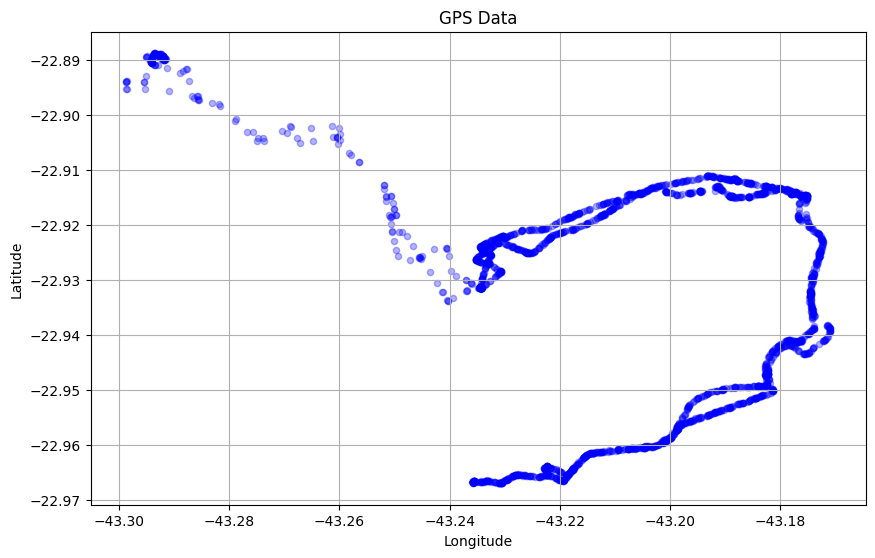

In [146]:
# Plot the gps data as a scatter plot
gps.plot_gps_data()

In [147]:
print(f"EVALUATING {len(gps.gps_df)} gps points over {len(gtfs.route_shape_segments)} route segments")
gps.filter_gps_coordinates(gtfs)
gps.gps_df

print("\nRESULTS AFTER FILTERING")
print(gps.gps_df["in_route"].value_counts())

EVALUATING 2580 gps points over 613 route segments



RESULTS AFTER FILTERING
in_route
True     2355
False     225
Name: count, dtype: int64


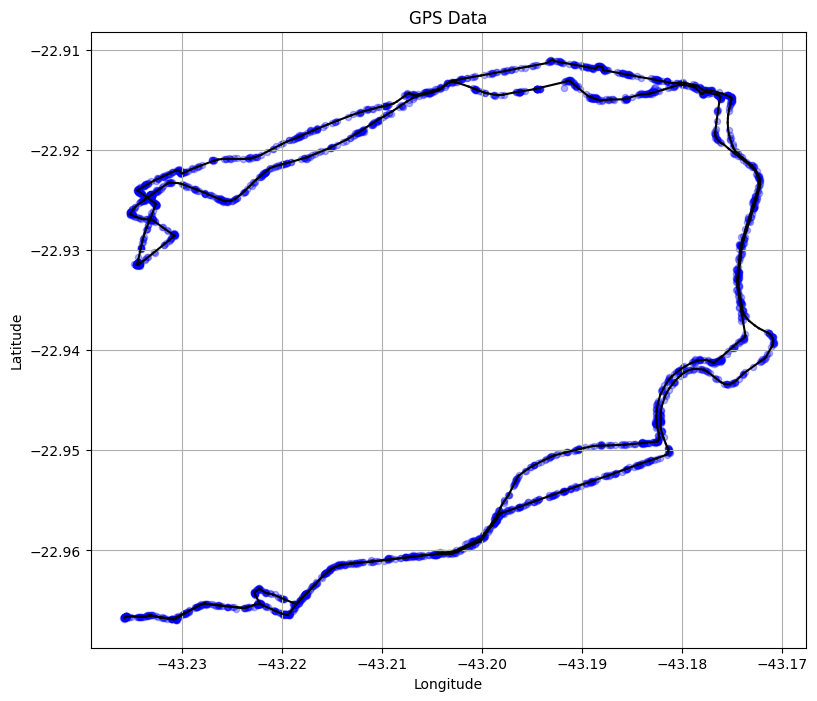

In [148]:
gps.plot_gps_data(gps.gps_df[gps.gps_df["in_route"] == True], gtfs.route_shape_segments)

In [149]:
gps.gps_df[gps.gps_df["in_route"] == True]

modo        timestamp_gps        data      hora id_veiculo  servico  \
44384  SPPO  2024-02-22 05:21:00  2024-02-22  05:21:00     A71505      409   
44319  SPPO  2024-02-22 05:21:21  2024-02-22  05:21:21     A71505      409   
44471  SPPO  2024-02-22 05:24:01  2024-02-22  05:24:01     A71505      409   
15656  SPPO  2024-02-22 05:24:19  2024-02-22  05:24:19     A71505      409   
22802  SPPO  2024-02-22 05:24:49  2024-02-22  05:24:49     A71505      409   
...     ...                  ...         ...       ...        ...      ...   
66318  SPPO  2024-02-22 21:57:07  2024-02-22  21:57:07     A71505      409   
59117  SPPO  2024-02-22 21:57:22  2024-02-22  21:57:22     A71505      409   
1049   SPPO  2024-02-22 21:57:24  2024-02-22  21:57:24     A71505      409   
30094  SPPO  2024-02-22 21:57:26  2024-02-22  21:57:26     A71505      409   
37212  SPPO  2024-02-22 21:57:31  2024-02-22  21:57:31     A71505      409   

       latitude  longitude  flag_em_operacao  flag_em_movimento  ...  \
44384 -22.93147  -43.23429             False               True  ...   
44319 -22.93147  -43.23429             False               True  ...   
44471 -22.93149  -43.23429             False               True  ...   
15656 -22.93145  -43.23428             False               True  ...   
22802 -22.93018  -43.23274             False               True  ...   
...         ...        ...               ...                ...  ...   
66318 -22.93128  -43.23447             False               True  ...   
59117 -22.93140  -43.23453             False               True  ...   
1049  -22.93144  -43.23456             False               True  ...   
30094 -22.93145  -43.23461             False               True  ...   
37212 -22.93140  -43.23475             False               True  ...   

                      status  velocidade_instantanea  \
44384  Operando fora trajeto                       0   
44319  Operando fora trajeto                       0   
44471  Operando fora trajeto                       0   
15656  Operando fora trajeto                       6   
22802  Operando fora trajeto                      26   
...                      ...                     ...   
66318  Operando fora trajeto                       9   
59117  Operando fora trajeto                       5   
1049   Operando fora trajeto                       8   
30094  Operando fora trajeto                      10   
37212  Operando fora trajeto                      11   

       velocidade_estimada_10_min   distancia  \
44384                        60.0  188.409359   
44319                        60.0    0.000000   
44471                        24.4    2.223902   
15656                        23.1    4.564175   
22802                        23.3  211.694082   
...                           ...         ...   
66318                        15.1   18.326329   
59117                        14.4   14.690167   
1049                         14.1    5.405695   
30094                        13.9    5.239723   
37212                        13.7   15.377325   

                                         versao  min_distance_0  \
44384  cff6b6680628d6addf7ddc09c0a0a154835e0ffe        7.024907   
44319  cff6b6680628d6addf7ddc09c0a0a154835e0ffe        7.024907   
44471  cff6b6680628d6addf7ddc09c0a0a154835e0ffe        8.948439   
15656  cff6b6680628d6addf7ddc09c0a0a154835e0ffe        5.710923   
22802  cff6b6680628d6addf7ddc09c0a0a154835e0ffe        2.120983   
...                                         ...             ...   
66318  cff6b6680628d6addf7ddc09c0a0a154835e0ffe       21.564258   
59117  cff6b6680628d6addf7ddc09c0a0a154835e0ffe       20.642301   
1049   cff6b6680628d6addf7ddc09c0a0a154835e0ffe       23.354907   
30094  cff6b6680628d6addf7ddc09c0a0a154835e0ffe       29.346318   
37212  cff6b6680628d6addf7ddc09c0a0a154835e0ffe       44.669743   

       closest_segment_index_0  min_distance_1 closest_segment_index_1  \
44384                        0        7.766971                  

In [150]:
gtfs.route_stops

stop_sequence       stop_id  stop_distance  direction_id shape_id  \
0                 0  2033O00100C0           0.00             0     gnoq   
57                1  2033O00211C0         354.51             0     gnoq   
88                2  2033O00212C0         636.83             0     gnoq   
119               3  2033O00177C0        1255.20             0     gnoq   
150               4  2033O00181C0        1715.36             0     gnoq   
...             ...           ...            ...           ...      ...   
3414             54  2033O00198C0       17641.20             1     wrbl   
3440             55  2033O00199C0       17864.67             1     wrbl   
3466             56  2033O00206C0       18472.22             1     wrbl   
3492             57  2033O00209C0       18704.27             1     wrbl   
3                58  2033O00100C0       18910.26             1     wrbl   

                                 stop_name   stop_lat   stop_lon  \
0     Ponto Final: Saens Peña :: Linha 409 -22.931494 -43.234319   
57                Hospital Casa Evangélico -22.929227 -43.231453   
88               Condomínio Edifício Madri -22.927700 -43.231800   
119                           General Roca -22.924980 -43.233660   
150              Saens Peña Medical Center -22.923610 -43.229666   
...                                    ...        ...        ...   
3414                           Major Ávila -22.922590 -43.231930   
3440                          General Roca -22.923546 -43.233767   
3466                       Silva Guimarães -22.927782 -43.233559   
3492                            Henry Ford -22.929797 -43.234198   
3     Ponto Final: Saens Peña :: Linha 409 -22.931494 -43.234319   

                         geometry  
0     POINT (-43.23432 -22.93149)  
57    POINT (-43.23145 -22.92923)  
88    POINT (-43.23180 -22.92770)  
119   POINT (-43.23366 -22.92498)  
150   POINT (-43.22967 -22.92361)  
...                           ...  
3414  POINT (-43.23193 -22.92259)  
3440  POINT (-43.23377 -22.92355)  
3466  POINT (-43.23356 -22.92778)  
3492  POINT (-43.23420 -22.92980)  
3     POINT (-43.23432 -22.93149)  

[123 rows x 9 columns]

In [151]:
gtfs.route_shapes

shape_id  shape_pt_sequence  shape_pt_lat  shape_pt_lon  \
197560     gnoq                  1     -22.93143     -43.23435   
197561     gnoq                  2     -22.93139     -43.23428   
197562     gnoq                  3     -22.93133     -43.23424   
197563     gnoq                  4     -22.93128     -43.23414   
197564     gnoq                  5     -22.93101     -43.23374   
...         ...                ...           ...           ...   
344912     wrbl                311     -22.92982     -43.23409   
344913     wrbl                312     -22.93090     -43.23433   
344914     wrbl                313     -22.93113     -43.23437   
344915     wrbl                314     -22.93146     -43.23452   
344916     wrbl                315     -22.93143     -43.23435   

        shape_dist_traveled  
197560                 0.00  
197561                 8.44  
197562                16.27  
197563                27.92  
197564                78.70  
...                     ...  
344912             18704.27  
344913             18826.85  
344914             18852.75  
344915             18892.53  
344916             18910.26  

[614 rows x 5 columns]

In [152]:
gps.get_distance_from_start(gtfs)

gps.gps_df

modo        timestamp_gps        data      hora id_veiculo  servico  \
36161  SPPO  2024-02-22 00:10:52  2024-02-22  00:10:52     A71505      409   
7169   SPPO  2024-02-22 00:40:52  2024-02-22  00:40:52     A71505      409   
15     SPPO  2024-02-22 01:10:52  2024-02-22  01:10:52     A71505      409   
43358  SPPO  2024-02-22 01:40:52  2024-02-22  01:40:52     A71505      409   
43353  SPPO  2024-02-22 02:10:52  2024-02-22  02:10:52     A71505      409   
...     ...                  ...         ...       ...        ...      ...   
36159  SPPO  2024-02-22 22:31:48  2024-02-22  22:31:48     A71505      409   
66480  SPPO  2024-02-22 22:31:51  2024-02-22  22:31:51     A71505      409   
8233   SPPO  2024-02-22 22:32:14  2024-02-22  22:32:14     A71505      409   
58015  SPPO  2024-02-22 23:02:13  2024-02-22  23:02:13     A71505      409   
43355  SPPO  2024-02-22 23:32:13  2024-02-22  23:32:13     A71505      409   

       latitude  longitude  flag_em_operacao  flag_em_movimento  ...  \
36161 -22.88941  -43.29206             False              False  ...   
7169  -22.88941  -43.29206             False              False  ...   
15    -22.88941  -43.29206             False              False  ...   
43358 -22.88941  -43.29206             False              False  ...   
43353 -22.88941  -43.29206             False              False  ...   
...         ...        ...               ...                ...  ...   
36159 -22.88893  -43.29271             False              False  ...   
66480 -22.88894  -43.29257             False               True  ...   
8233  -22.88902  -43.29242             False               True  ...   
58015 -22.88903  -43.29244             False              False  ...   
43355 -22.88903  -43.29244             False              False  ...   

      velocidade_estimada_10_min  distancia  \
36161                        0.0        NaN   
7169                         0.0   0.000000   
15                           0.0   0.000000   
43358                        0.0   0.000000   
43353                        0.0   0.000000   
...                          ...        ...   
36159                        2.7  11.380338   
66480                        3.3  14.384594   
8233                         3.4  17.755114   
58015                        0.0   2.331091   
43355                        0.0   0.000000   

                                         versao  min_distance_0  \
36161  cff6b6680628d6addf7ddc09c0a0a154835e0ffe     7545.673706   
7169   cff6b6680628d6addf7ddc09c0a0a154835e0ffe     7545.673706   
15     cff6b6680628d6addf7ddc09c0a0a154835e0ffe     7545.673706   
43358  cff6b6680628d6addf7ddc09c0a0a154835e0ffe     7545.673706   
43353  cff6b6680628d6addf7ddc09c0a0a154835e0ffe     7545.673706   
...                                         ...             ...   
36159  cff6b6680628d6addf7ddc09c0a0a154835e0ffe     7635.269518   
66480  cff6b6680628d6addf7ddc09c0a0a154835e0ffe     7621.428047   
8233   cff6b6680628d6addf7ddc09c0a0a154835e0ffe     7602.705458   
58015  cff6b6680628d6addf7ddc09c0a0a154835e0ffe     7603.901653   
43355  cff6b6680628d6addf7ddc09c0a0a154835e0ffe     7603.901653   

      closest_segment_index_0  min_distance_1  closest_segment_index_1  \
36161                      13     7475.628685                      302   
7169                       13     7475.628685                      302   
15                         13     7475.628685                      302   
43358                      13     7475.628685                      302   
43353                      13     7475.628685                      302   
...                       ...             ...                      ...   
36159                      13     7564.972850                      302   
66480                      13     7550.873646                      302   
8233                       13     7532.106406                      302   
58015                      13     7533.374960                      302   
43355                

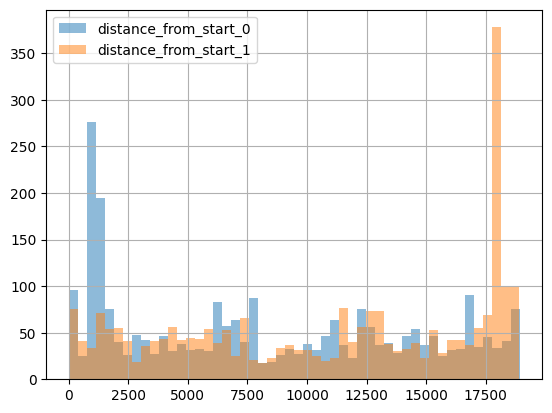

In [153]:
# Plot a histogram of distance_from_start_0 and distance_from_start_1
gps.gps_df["distance_from_start_0"].hist(bins=50, alpha=0.5, label="distance_from_start_0")
gps.gps_df["distance_from_start_1"].hist(bins=50, alpha=0.5, label="distance_from_start_1")
plt.legend()
plt.show()

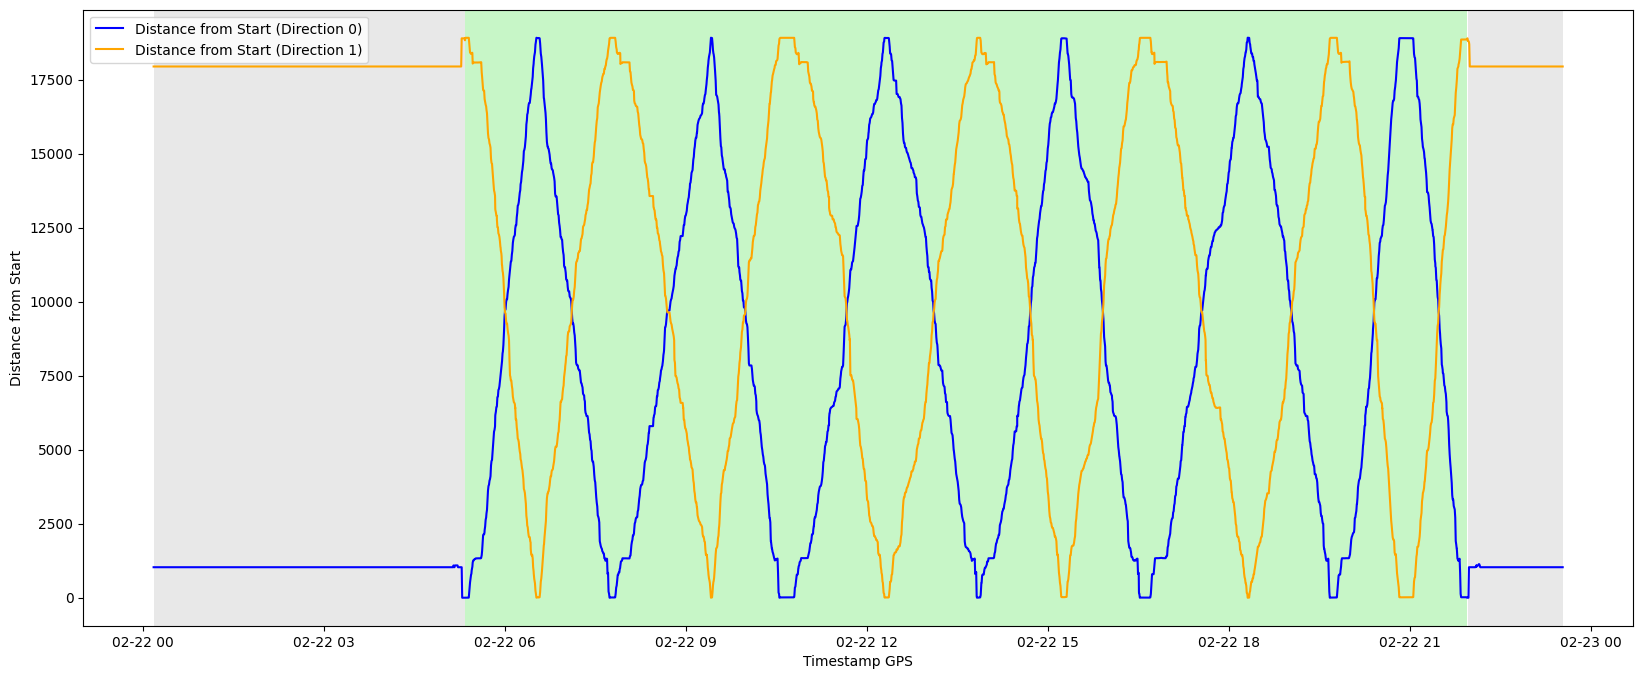

In [154]:
# Assuming gps.gps_df is your DataFrame and it's already loaded
df = gps.gps_df

# Create a new figure and axis
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Convert timestamp_gps to datetime64 on the datafrmae column
df['timestamp_gps'] = pd.to_datetime(df['timestamp_gps'])

timestamp = df['timestamp_gps'].to_numpy()
distance_from_start_0 = df['distance_from_start_0'].to_numpy()
distance_from_start_1 = df['distance_from_start_1'].to_numpy()

ax.plot(timestamp, distance_from_start_0, label='Distance from Start (Direction 0)', color='blue')
ax.plot(timestamp, distance_from_start_1, label='Distance from Start (Direction 1)', color='orange')

# Get unique values from 'in_route' column and create a colormap
colors = {True: 'lightgreen', False: 'lightgrey'}  # Modify colors as needed

# Group by 'in_route' status and apply coloring
in_route = df['in_route'].to_numpy()

# Find indices where 'in_route' changes
change_indices = np.where(in_route[:-1] != in_route[1:])[0] + 1

# Include the start and end of the array
change_indices = np.concatenate(([0], change_indices, [len(in_route)]))

# Apply coloring to the background based on 'in_route' values
for start, end in zip(change_indices[:-1], change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=colors[in_route[start]], alpha=0.5)

# Add legend and labels
ax.set_xlabel('Timestamp GPS')
ax.set_ylabel('Distance from Start')
ax.legend()

# Show plot
plt.show()

In [155]:
# Assign the direction and direction inference to each GPS point
df['direction'], df['direction_directly_infered'] = utils.assign_direction(df['in_route'].to_numpy(), df['distance_from_start_0'].to_numpy(), df['distance_from_start_1'].to_numpy(), N=3)

df['direction_directly_infered'].value_counts()

direction_directly_infered
True     1522
False    1058
Name: count, dtype: int64

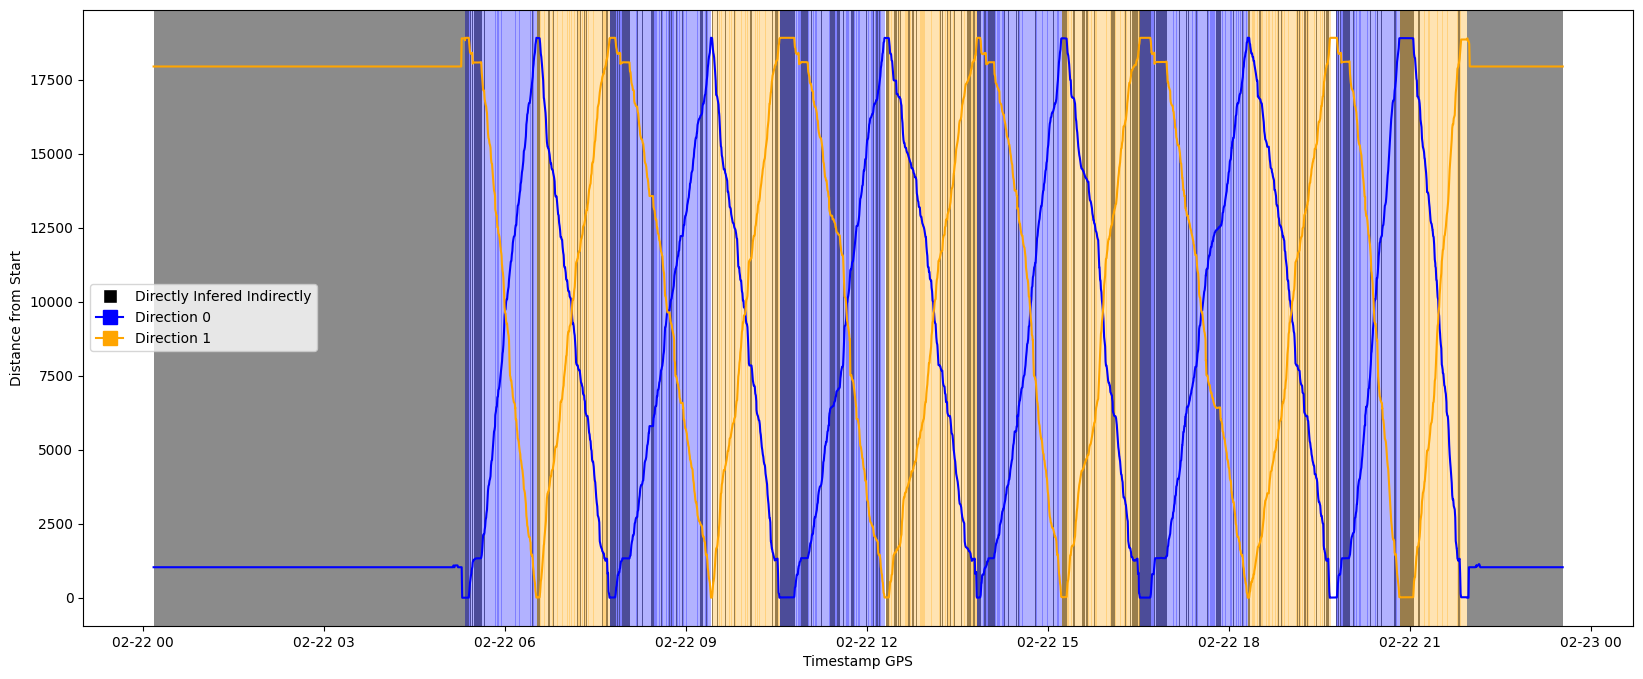

-1: [0:127]
0: [127:298]
1: [298:471]
0: [471:714]
1: [714:882]
0: [882:1120]
1: [1120:1341]
0: [1341:1541]
1: [1541:1746]
0: [1746:1993]
1: [1993:2183]
0: [2183:2349]
1: [2349:2477]
-1: [2477:2580]


In [156]:
# Plot the gps datapoints coloring acording to the 'direction' column(-1, 0 or 1)
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Convert timestamp_gps to datetime64 on the datafrmae column
df['timestamp_gps'] = pd.to_datetime(df['timestamp_gps'])

timestamp = df['timestamp_gps'].to_numpy()
distance_from_start_0 = df['distance_from_start_0'].to_numpy()
distance_from_start_1 = df['distance_from_start_1'].to_numpy()

ax.plot(timestamp, distance_from_start_0, label='Distance from Start (Direction 0)', color='blue')
ax.plot(timestamp, distance_from_start_1, label='Distance from Start (Direction 1)', color='orange')

# Get unique values from 'direction' column and create a colormap
colors = {-1: 'lightgrey', 0: 'blue', 1: 'orange'}  # Modify colors as needed

# Group by 'direction' status and apply coloring
direction = df['direction'].to_numpy()

# Find indices where 'direction' changes
change_indices = np.where(direction[:-1] != direction[1:])[0] + 1

# Include the start and end of the array
change_indices = np.concatenate(([0], change_indices, [len(direction)]))

# Apply coloring to the background based on 'direction' values
for start, end in zip(change_indices[:-1], change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=colors[direction[start]], alpha=0.5)

# Do the same with the direction inference method
direction_directly_infered = df['direction_directly_infered'].to_numpy()
direction_directly_infered_change_indices = np.where(direction_directly_infered[:-1] != direction_directly_infered[1:])[0] + 1
direction_directly_infered_change_indices = np.concatenate(([0], direction_directly_infered_change_indices, [len(direction_directly_infered)]))
direction_directly_infered_colors = {False: 'black', True: 'white'}  # Modify colors as needed

# Add texture to the background based on 'direction_directly_infered' values
for start, end in zip(direction_directly_infered_change_indices[:-1], direction_directly_infered_change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=direction_directly_infered_colors[direction_directly_infered[start]], alpha=0.4)

# Add labels
ax.set_xlabel('Timestamp GPS')
ax.set_ylabel('Distance from Start')

# Add a custom legend
legend_elements = [plt.Line2D([0], [0], color='w', markerfacecolor='black', marker='s', markersize=10, label='Directly Infered Indirectly'),
                   plt.Line2D([0], [0], color='blue', markerfacecolor='blue', marker='s', markersize=10, label='Direction 0'),
                   plt.Line2D([0], [0], color='orange', markerfacecolor='orange', marker='s', markersize=10, label='Direction 1')]

ax.legend(handles=legend_elements)

# Show plot
plt.show()

# Print the clusters (Value: [StartIndex:EndIndex]) of values inside direction array
for i in range(len(change_indices) - 1):
    print(f"{direction[change_indices[i]]}: [{change_indices[i]}:{change_indices[i+1]}]")

In [157]:
df['distance_traveled'], df['cumulative_distance_traveled'] = utils.assign_distance_traveled(df['in_route'].to_numpy(), df['direction'].to_numpy(), df['distance_from_start_0'].to_numpy(), df['distance_from_start_1'].to_numpy())

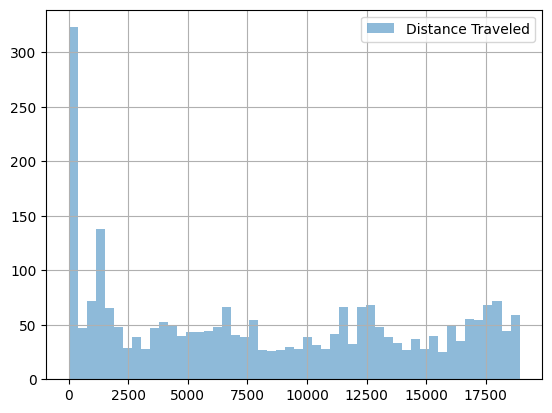

In [158]:
# Plot a histogram of the distance traveled
df['distance_traveled'].hist(bins=50, alpha=0.5, label='Distance Traveled')

plt.legend()
plt.show()

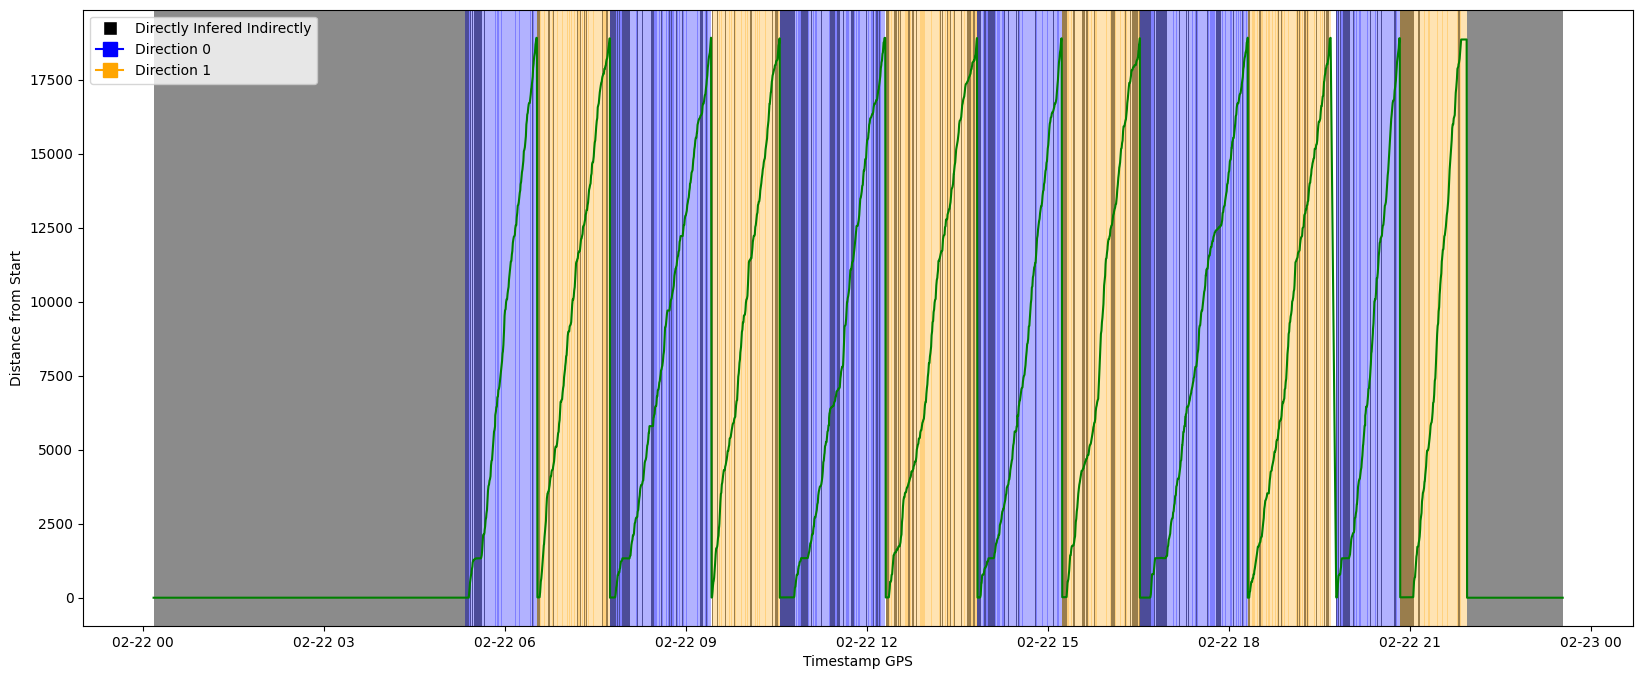

-1: [0:127]
0: [127:298]
1: [298:471]
0: [471:714]
1: [714:882]
0: [882:1120]
1: [1120:1341]
0: [1341:1541]
1: [1541:1746]
0: [1746:1993]
1: [1993:2183]
0: [2183:2349]
1: [2349:2477]
-1: [2477:2580]


In [159]:
# Plot the gps datapoints coloring acording to the 'direction' column(-1, 0 or 1)
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Convert timestamp_gps to datetime64 on the datafrmae column
df['timestamp_gps'] = pd.to_datetime(df['timestamp_gps'])

timestamp = df['timestamp_gps'].to_numpy()
distance_traveled = df['distance_traveled'].to_numpy()

ax.plot(timestamp, distance_traveled, label='Distance Traveled', color='green')

# Get unique values from 'direction' column and create a colormap
colors = {-1: 'lightgrey', 0: 'blue', 1: 'orange'}  # Modify colors as needed

# Group by 'direction' status and apply coloring
direction = df['direction'].to_numpy()

# Find indices where 'direction' changes
change_indices = np.where(direction[:-1] != direction[1:])[0] + 1

# Include the start and end of the array
change_indices = np.concatenate(([0], change_indices, [len(direction)]))

# Apply coloring to the background based on 'direction' values
for start, end in zip(change_indices[:-1], change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=colors[direction[start]], alpha=0.5)

# Do the same with the direction inference method
direction_directly_infered = df['direction_directly_infered'].to_numpy()
direction_directly_infered_change_indices = np.where(direction_directly_infered[:-1] != direction_directly_infered[1:])[0] + 1
direction_directly_infered_change_indices = np.concatenate(([0], direction_directly_infered_change_indices, [len(direction_directly_infered)]))
direction_directly_infered_colors = {False: 'black', True: 'white'}  # Modify colors as needed

# Add texture to the background based on 'direction_directly_infered' values
for start, end in zip(direction_directly_infered_change_indices[:-1], direction_directly_infered_change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=direction_directly_infered_colors[direction_directly_infered[start]], alpha=0.4)

# Add labels
ax.set_xlabel('Timestamp GPS')
ax.set_ylabel('Distance from Start')

# Add a custom legend
legend_elements = [plt.Line2D([0], [0], color='w', markerfacecolor='black', marker='s', markersize=10, label='Directly Infered Indirectly'),
                   plt.Line2D([0], [0], color='blue', markerfacecolor='blue', marker='s', markersize=10, label='Direction 0'),
                   plt.Line2D([0], [0], color='orange', markerfacecolor='orange', marker='s', markersize=10, label='Direction 1')]

ax.legend(handles=legend_elements)

# Show plot
plt.show()

# Print the clusters (Value: [StartIndex:EndIndex]) of values inside direction array
for i in range(len(change_indices) - 1):
    print(f"{direction[change_indices[i]]}: [{change_indices[i]}:{change_indices[i+1]}]")

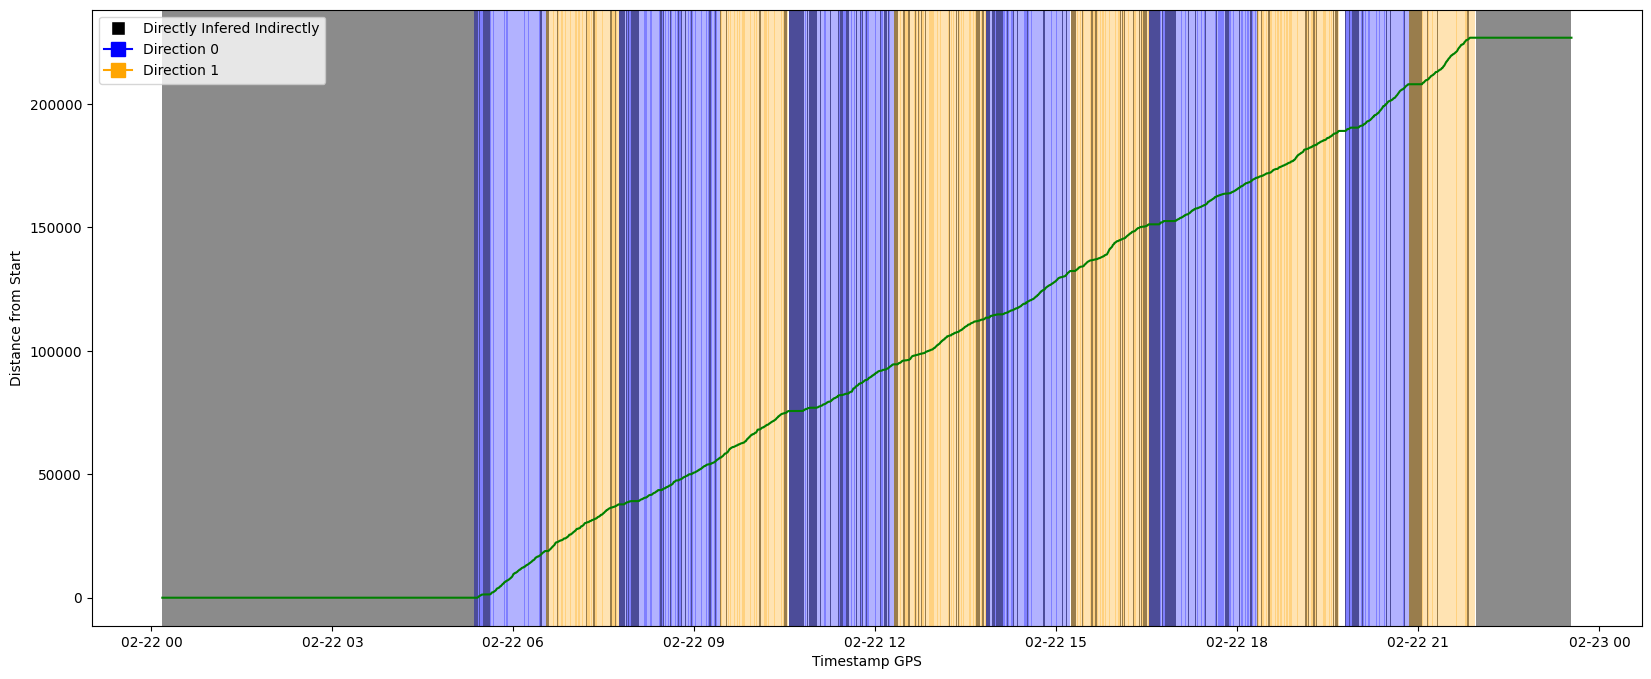

-1: [0:127]
0: [127:298]
1: [298:471]
0: [471:714]
1: [714:882]
0: [882:1120]
1: [1120:1341]
0: [1341:1541]
1: [1541:1746]
0: [1746:1993]
1: [1993:2183]
0: [2183:2349]
1: [2349:2477]
-1: [2477:2580]


In [160]:
# Plot the gps datapoints coloring acording to the 'direction' column(-1, 0 or 1)
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Convert timestamp_gps to datetime64 on the datafrmae column
df['timestamp_gps'] = pd.to_datetime(df['timestamp_gps'])

timestamp = df['timestamp_gps'].to_numpy()
cumulative_distance_traveled = df['cumulative_distance_traveled'].to_numpy()

ax.plot(timestamp, cumulative_distance_traveled, label='Cumulative Distance Traveled', color='green')

# Get unique values from 'direction' column and create a colormap
colors = {-1: 'lightgrey', 0: 'blue', 1: 'orange'}  # Modify colors as needed

# Group by 'direction' status and apply coloring
direction = df['direction'].to_numpy()

# Find indices where 'direction' changes
change_indices = np.where(direction[:-1] != direction[1:])[0] + 1

# Include the start and end of the array
change_indices = np.concatenate(([0], change_indices, [len(direction)]))

# Apply coloring to the background based on 'direction' values
for start, end in zip(change_indices[:-1], change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=colors[direction[start]], alpha=0.5)

# Do the same with the direction inference method
direction_directly_infered = df['direction_directly_infered'].to_numpy()
direction_directly_infered_change_indices = np.where(direction_directly_infered[:-1] != direction_directly_infered[1:])[0] + 1
direction_directly_infered_change_indices = np.concatenate(([0], direction_directly_infered_change_indices, [len(direction_directly_infered)]))
direction_directly_infered_colors = {False: 'black', True: 'white'}  # Modify colors as needed

# Add texture to the background based on 'direction_directly_infered' values
for start, end in zip(direction_directly_infered_change_indices[:-1], direction_directly_infered_change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=direction_directly_infered_colors[direction_directly_infered[start]], alpha=0.4)

# Add labels
ax.set_xlabel('Timestamp GPS')
ax.set_ylabel('Distance from Start')

# Add a custom legend
legend_elements = [plt.Line2D([0], [0], color='w', markerfacecolor='black', marker='s', markersize=10, label='Directly Infered Indirectly'),
                   plt.Line2D([0], [0], color='blue', markerfacecolor='blue', marker='s', markersize=10, label='Direction 0'),
                   plt.Line2D([0], [0], color='orange', markerfacecolor='orange', marker='s', markersize=10, label='Direction 1')]

ax.legend(handles=legend_elements)

# Show plot
plt.show()

# Print the clusters (Value: [StartIndex:EndIndex]) of values inside direction array
for i in range(len(change_indices) - 1):
    print(f"{direction[change_indices[i]]}: [{change_indices[i]}:{change_indices[i+1]}]")

In [161]:
df

modo       timestamp_gps        data      hora id_veiculo  servico  \
36161  SPPO 2024-02-22 00:10:52  2024-02-22  00:10:52     A71505      409   
7169   SPPO 2024-02-22 00:40:52  2024-02-22  00:40:52     A71505      409   
15     SPPO 2024-02-22 01:10:52  2024-02-22  01:10:52     A71505      409   
43358  SPPO 2024-02-22 01:40:52  2024-02-22  01:40:52     A71505      409   
43353  SPPO 2024-02-22 02:10:52  2024-02-22  02:10:52     A71505      409   
...     ...                 ...         ...       ...        ...      ...   
36159  SPPO 2024-02-22 22:31:48  2024-02-22  22:31:48     A71505      409   
66480  SPPO 2024-02-22 22:31:51  2024-02-22  22:31:51     A71505      409   
8233   SPPO 2024-02-22 22:32:14  2024-02-22  22:32:14     A71505      409   
58015  SPPO 2024-02-22 23:02:13  2024-02-22  23:02:13     A71505      409   
43355  SPPO 2024-02-22 23:32:13  2024-02-22  23:32:13     A71505      409   

       latitude  longitude  flag_em_operacao  flag_em_movimento  ...  \
36161 -22.88941  -43.29206             False              False  ...   
7169  -22.88941  -43.29206             False              False  ...   
15    -22.88941  -43.29206             False              False  ...   
43358 -22.88941  -43.29206             False              False  ...   
43353 -22.88941  -43.29206             False              False  ...   
...         ...        ...               ...                ...  ...   
36159 -22.88893  -43.29271             False              False  ...   
66480 -22.88894  -43.29257             False               True  ...   
8233  -22.88902  -43.29242             False               True  ...   
58015 -22.88903  -43.29244             False              False  ...   
43355 -22.88903  -43.29244             False              False  ...   

      closest_segment_index_0  min_distance_1  closest_segment_index_1  \
36161                      13     7475.628685                      302   
7169                       13     7475.628685                      302   
15                         13     7475.628685                      302   
43358                      13     7475.628685                      302   
43353                      13     7475.628685                      302   
...                       ...             ...                      ...   
36159                      13     7564.972850                      302   
66480                      13     7550.873646                      302   
8233                       13     7532.106406                      302   
58015                      13     7533.374960                      302   
43355                      13     7533.374960                      302   

       in_route distance_from_start_0  distance_from_start_1  direction  \
36161     False           1030.199951           17942.060547         -1   
7169      False           1030.199951           17942.060547         -1   
15        False           1030.199951           17942.060547         -1   
43358     False           1030.199951           17942.060547         -1   
43353     False           1030.199951           17942.060547         -1   
...         ...                   ...                    ...        ...   
36159     False           1030.199951           17942.060547         -1   
66480     False           1030.199951           17942.060547         -1   
8233      False           1030.199951           17942.060547         -1   
58015     False           1030.199951           17942.060547         -1   
43355     False           1030.199951           17942.060547         -1   

       direction_directly_infered distance_traveled  \
36161                       False               0.0   
7169                        False               0.0   
15                          False               0.0   
43358                       False               0.0   
43353                       False               0.0   
...                           ...               ...   
36159                       False         

In [162]:
gtfs.route_stops

stop_sequence       stop_id  stop_distance  direction_id shape_id  \
0                 0  2033O00100C0           0.00             0     gnoq   
57                1  2033O00211C0         354.51             0     gnoq   
88                2  2033O00212C0         636.83             0     gnoq   
119               3  2033O00177C0        1255.20             0     gnoq   
150               4  2033O00181C0        1715.36             0     gnoq   
...             ...           ...            ...           ...      ...   
3414             54  2033O00198C0       17641.20             1     wrbl   
3440             55  2033O00199C0       17864.67             1     wrbl   
3466             56  2033O00206C0       18472.22             1     wrbl   
3492             57  2033O00209C0       18704.27             1     wrbl   
3                58  2033O00100C0       18910.26             1     wrbl   

                                 stop_name   stop_lat   stop_lon  \
0     Ponto Final: Saens Peña :: Linha 409 -22.931494 -43.234319   
57                Hospital Casa Evangélico -22.929227 -43.231453   
88               Condomínio Edifício Madri -22.927700 -43.231800   
119                           General Roca -22.924980 -43.233660   
150              Saens Peña Medical Center -22.923610 -43.229666   
...                                    ...        ...        ...   
3414                           Major Ávila -22.922590 -43.231930   
3440                          General Roca -22.923546 -43.233767   
3466                       Silva Guimarães -22.927782 -43.233559   
3492                            Henry Ford -22.929797 -43.234198   
3     Ponto Final: Saens Peña :: Linha 409 -22.931494 -43.234319   

                         geometry  
0     POINT (-43.23432 -22.93149)  
57    POINT (-43.23145 -22.92923)  
88    POINT (-43.23180 -22.92770)  
119   POINT (-43.23366 -22.92498)  
150   POINT (-43.22967 -22.92361)  
...                           ...  
3414  POINT (-43.23193 -22.92259)  
3440  POINT (-43.23377 -22.92355)  
3466  POINT (-43.23356 -22.92778)  
3492  POINT (-43.23420 -22.92980)  
3     POINT (-43.23432 -22.93149)  

[123 rows x 9 columns]

In [163]:
gtfs.get_stops_by_direction()

In [164]:
gtfs.stops_by_direction

[      stop_sequence       stop_id  stop_distance  direction_id shape_id  \
 0                 0  2033O00100C0           0.00             0     gnoq   
 57                1  2033O00211C0         354.51             0     gnoq   
 88                2  2033O00212C0         636.83             0     gnoq   
 119               3  2033O00177C0        1255.20             0     gnoq   
 150               4  2033O00181C0        1715.36             0     gnoq   
 ...             ...           ...            ...           ...      ...   
 1855             59  2028O00018C0       17884.95             0     gnoq   
 1886             60  2028O00019C0       18146.96             0     gnoq   
 1917             61  2028O00020C0       18270.31             0     gnoq   
 1948             62  2028O00021C0       18452.15             0     gnoq   
 1979             63  2028O00001C0       18913.66             0     gnoq   
 
                                  stop_name   stop_lat   stop_lon  \
 0     Ponto Fina

In [165]:
gtfs.stops_distances_by_direction

[array([    0.  ,   354.51,   636.83,  1255.2 ,  1715.36,  1928.52,
         2118.75,  2398.78,  2635.71,  2916.32,  3157.51,  3438.28,
         3780.63,  3932.73,  4297.04,  4616.7 ,  4912.81,  5164.51,
         5607.03,  6227.58,  6441.58,  6816.3 ,  7006.32,  7284.34,
         7478.45,  7700.13,  7991.87,  8236.1 ,  8692.06,  9135.26,
         9394.19,  9695.1 ,  9968.64, 10201.03, 10351.09, 10480.63,
        10888.38, 11053.36, 11473.67, 11659.9 , 12217.91, 12582.09,
        12991.72, 13259.19, 13534.4 , 13728.36, 13986.49, 14338.3 ,
        14801.07, 15187.22, 15439.34, 15701.68, 16017.13, 16321.33,
        16759.65, 16971.07, 17155.34, 17516.3 , 17702.51, 17884.95,
        18146.96, 18270.31, 18452.15, 18913.66]),
 array([    0.  ,   538.15,   648.  ,   765.24,   990.16,  1175.79,
         1400.99,  1594.27,  2047.21,  2394.54,  2656.59,  2948.01,
         3296.92,  3521.03,  3882.85,  4288.67,  4611.26,  4764.49,
         5072.04,  5371.83,  5651.31,  5772.71,  6030.84,  6640.92

In [166]:
df['last_stop_index'], df['next_stop_index'], df['last_stop_distance'], df['next_stop_distance'] = utils.assign_stops(df['in_route'].to_numpy(), df['direction'].to_numpy(), df['distance_traveled'].to_numpy(), gtfs.stops_distances_by_direction)

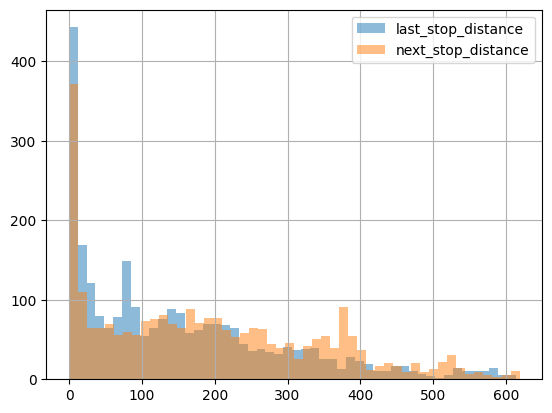

In [168]:
# Plot a histogram of the last_stop_distance and next_stop_distance
df['last_stop_distance'].hist(bins=50, alpha=0.5, label='last_stop_distance')
df['next_stop_distance'].hist(bins=50, alpha=0.5, label='next_stop_distance')

plt.legend()
plt.show()

In [170]:
virtual_datdf_virtualapoints = utils.virtualize_stop_points(df['timestamp_gps'].to_numpy(), df['in_route'].to_numpy(), df['direction'].to_numpy(), df['last_stop_index'].to_numpy(), df['next_stop_index'].to_numpy(), df['distance_traveled'].to_numpy(), df['cumulative_distance_traveled'].to_numpy(), gtfs.stops_distances_by_direction)

In [174]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

modo       timestamp_gps        data      hora id_veiculo  servico  \
0     SPPO 2024-02-22 00:10:52  2024-02-22  00:10:52     A71505      409   
1     SPPO 2024-02-22 00:40:52  2024-02-22  00:40:52     A71505      409   
2     SPPO 2024-02-22 01:10:52  2024-02-22  01:10:52     A71505      409   
3     SPPO 2024-02-22 01:40:52  2024-02-22  01:40:52     A71505      409   
4     SPPO 2024-02-22 02:10:52  2024-02-22  02:10:52     A71505      409   
5     SPPO 2024-02-22 02:40:29  2024-02-22  02:40:29     A71505      409   
6     SPPO 2024-02-22 02:40:59  2024-02-22  02:40:59     A71505      409   
7     SPPO 2024-02-22 02:41:29  2024-02-22  02:41:29     A71505      409   
8     SPPO 2024-02-22 02:41:59  2024-02-22  02:41:59     A71505      409   
9     SPPO 2024-02-22 02:42:11  2024-02-22  02:42:11     A71505      409   
10    SPPO 2024-02-22 02:42:28  2024-02-22  02:42:28     A71505      409   
11    SPPO 2024-02-22 02:42:35  2024-02-22  02:42:35     A71505      409   
12    SPPO 2024-02-22 02:42:41  2024-02-22  02:42:41     A71505      409   
13    SPPO 2024-02-22 02:42:44  2024-02-22  02:42:44     A71505      409   
14    SPPO 2024-02-22 02:43:14  2024-02-22  02:43:14     A71505      409   
15    SPPO 2024-02-22 02:43:44  2024-02-22  02:43:44     A71505      409   
16    SPPO 2024-02-22 02:44:14  2024-02-22  02:44:14     A71505      409   
17    SPPO 2024-02-22 02:44:44  2024-02-22  02:44:44     A71505      409   
18    SPPO 2024-02-22 02:45:14  2024-02-22  02:45:14     A71505      409   
19    SPPO 2024-02-22 02:45:44  2024-02-22  02:45:44     A71505      409   
20    SPPO 2024-02-22 02:46:14  2024-02-22  02:46:14     A71505      409   
21    SPPO 2024-02-22 02:46:44  2024-02-22  02:46:44     A71505      409   
22    SPPO 2024-02-22 02:46:53  2024-02-22  02:46:53     A71505      409   
23    SPPO 2024-02-22 02:46:55  2024-02-22  02:46:55     A71505      409   
24    SPPO 2024-02-22 02:46:58  2024-02-22  02:46:58     A71505      409   
25    SPPO 2024-02-22 02:47:05  2024-02-22  02:47:05     A71505      409   
26    SPPO 2024-02-22 02:47:35  2024-02-22  02:47:35     A71505      409   
27    SPPO 2024-02-22 02:47:45  2024-02-22  02:47:45     A71505      409   
28    SPPO 2024-02-22 02:48:15  2024-02-22  02:48:15     A71505      409   
29    SPPO 2024-02-22 02:48:45  2024-02-22  02:48:45     A71505      409   
30    SPPO 2024-02-22 02:49:15  2024-02-22  02:49:15     A71505      409   
31    SPPO 2024-02-22 02:49:45  2024-02-22  02:49:45     A71505      409   
32    SPPO 2024-02-22 02:50:00  2024-02-22  02:50:00     A71505      409   
33    SPPO 2024-02-22 02:50:12  2024-02-22  02:50:12     A71505      409   
34    SPPO 2024-02-22 02:50:37  2024-02-22  02:50:37     A71505      409   
35    SPPO 2024-02-22 03:20:37  2024-02-22  03:20:37     A71505      409   
36    SPPO 2024-02-22 03:50:37  2024-02-22  03:50:37     A71505      409   
37    SPPO 2024-02-22 04:20:37  2024-02-22  04:20:37     A71505      409   
38    SPPO 2024-02-22 04:32:33  2024-02-22  04:32:33     A71505      409   
39    SPPO 2024-02-22 04:33:03  2024-02-22  04:33:03     A71505      409   
40    SPPO 2024-02-22 04:33:33  2024-02-22  04:33:33     A71505      409   
41    SPPO 2024-02-22 04:34:03  2024-02-22  04:34:03     A71505      409   
42    SPPO 2024-02-22 04:34:33  2024-02-22  04:34:33     A71505      409   
43    SPPO 2024-02-22 04:35:03  2024-02-22  04:35:03     A71505      409   
44    SPPO 2024-02-22 04:35:33  2024-02-22  04:35:33     A71505      409   
45    SPPO 2024-02-22 04:36:03  2024-02-22  04:36:03     A71505      409   
46    SPPO 2024-02-22 04:36:33  2024-02-22  04:36:33     A71505      409   
47    SPPO 2024-02-22 04:36:34  2024-02-22  04:36:34     A71505      409   
48    SPPO 2024-02-22 04:55:57  2024-02-22  04:55:57     A71505      409   
49    SPPO 2024-02-22 04:56:27  2024-02-22  04:56:27     A71505      409   
50    SPPO 2024-02-22 04:56:57  2024-02-22  04:56:57     A71505      409   
51    SPPO 2024-02-22 04:57:27  2024-02-22  04:57:27  

In [171]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_virtual)

timestamp_gps  distance_traveled  \
0   2024-02-22 05:25:06.738839871             354.51   
1   2024-02-22 05:26:01.323142189             636.83   
2   2024-02-22 05:28:40.450139514            1255.20   
3   2024-02-22 05:37:49.294441630            1715.36   
4   2024-02-22 05:38:13.443899364            1928.52   
5   2024-02-22 05:38:39.819598794            2118.75   
6   2024-02-22 05:40:32.604815892            2398.78   
7   2024-02-22 05:41:06.909613006            2635.71   
8   2024-02-22 05:42:12.664029663            2916.32   
9   2024-02-22 05:42:44.148828576            3157.51   
10  2024-02-22 05:43:09.574536362            3438.28   
11  2024-02-22 05:44:00.917110907            3780.63   
12  2024-02-22 05:44:51.095226314            3932.73   
13  2024-02-22 05:46:11.008541044            4297.04   
14  2024-02-22 05:46:54.815432078            4616.70   
15  2024-02-22 05:47:57.103136037            4912.81   
16  2024-02-22 05:48:27.963946089            5164.51   
17  2024-02-22 05:49:24.805812201            5607.03   
18  2024-02-22 05:50:58.831930416            6227.58   
19  2024-02-22 05:51:53.999716869            6441.58   
20  2024-02-22 05:53:20.197729285            6816.30   
21  2024-02-22 05:53:45.915817021            7006.32   
22  2024-02-22 05:55:12.683702441            7284.34   
23  2024-02-22 05:55:42.777974053            7478.45   
24  2024-02-22 05:56:29.027982479            7700.13   
25  2024-02-22 05:57:15.805537272            7991.87   
26  2024-02-22 05:57:51.743578576            8236.10   
27  2024-02-22 05:58:57.415279073            8692.06   
28  2024-02-22 05:59:30.310195647            9135.26   
29  2024-02-22 05:59:46.299537064            9394.19   
30  2024-02-22 06:00:21.538597722            9695.10   
31  2024-02-22 06:01:22.602909572            9968.64   
32  2024-02-22 06:02:43.153475265           10201.03   
33  2024-02-22 06:03:12.759627840           10351.09   
34  2024-02-22 06:03:48.323197045           10480.63   
35  2024-02-22 06:04:45.152125140           10888.38   
36  2024-02-22 06:05:16.437579188           11053.36   
37  2024-02-22 06:06:52.314770883           11473.67   
38  2024-02-22 06:07:25.255063387           11659.90   
39  2024-02-22 06:09:41.646786090           12217.91   
40  2024-02-22 06:11:31.000017344           12582.09   
41  2024-02-22 06:12:29.788913319           12991.72   
42  2024-02-22 06:13:19.742251655           13259.19   
43  2024-02-22 06:14:30.999934493           13534.40   
44  2024-02-22 06:15:18.293982462           13728.36   
45  2024-02-22 06:15:58.934209386           13986.49   
46  2024-02-22 06:17:06.338443977           14338.30   
47  2024-02-22 06:18:39.262166497           14801.07   
48  2024-02-22 06:19:55.247937407           15187.22   
49  2024-02-22 06:20:38.679721327           15439.34   
50  2024-02-22 06:21:13.812473699           15701.68   
51  2024-02-22 06:21:41.887092400           16017.13   
52  2024-02-22 06:22:28.346301967           16321.33   
53  2024-02-22 06:25:07.045152715           16759.65   
54  2024-02-22 06:25:44.926497901           16971.07   
55  2024-02-22 06:26:20.049044983           17155.34   
56  2024-02-22 06:27:33.417503729           17516.30   
57  2024-02-22 06:28:02.439670179           17702.51   
58  2024-02-22 06:28:18.447279281           17884.95   
59  2024-02-22 06:29:01.686833789           18146.96   
60  2024-02-22 06:29:22.693519452           18270.31   
61  2024-02-22 06:30:11.067595978           18452.15   
62  2024-02-22 06:35:55.438874915             538.15   
63  2024-02-22 06:36:24.166063738             648.00   
64  2024-02-22 06:36:44.810629302             765.24   
65  2024-02-22 06:37:16.410124664             990.16   
66  2024-02-22 06:37:41.397642320            1175.79   
67  2024-02-22 06:38:09.717898207            1400.99   
68  2024-02-22 06:38:32.262484432            1594.27   
69  2024-02-22 06:39:37.718408126            2047.21   
70  2024-02-22 06:40:39.170827674           